# FINAL ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/El-Razi/Downloads/All-seasons.csv')

## Frame Manipulation

In [3]:
# 17 rows dropped where observation was list of column names
df = df.loc[df['Season'] != 'Season']

In [4]:
# Season/Episode grouping
df_seas = df.groupby(['Season', 'Episode'])['Line'].apply(lambda x: ' '.join(x)).reset_index()

In [5]:
df_seas['Length'] = df_seas['Line'].apply(len)

### Text Cleaning

In [6]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Punct and Lower
    nopunc = [char.lower() for char in mess if char not in string.punctuation]

    # Numbers
    nonumb = [char for char in nopunc if char not in '0123456789']
    
    # Join the characters again to form the string.
    clean = ''.join(nonumb)
    
    # Now just remove any stopwords
    return [word.split('\\')[0] for word in clean.split() if word.lower() not in stopwords.words('english')]

## Vectorize

#### Count

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vectorizer = CountVectorizer(analyzer=text_process, min_df=2)

In [9]:
X = vectorizer.fit_transform(df_seas['Line'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [10]:
print vectorizer.get_feature_names()

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaah', 'aaaaaaaaaaaah', 'aaaaaaaaaah', 'aaaaaaaaah', 'aaaaaaaah', 'aaaaaaah', 'aaaaaaahh', 'aaaaaagh', 'aaaaaah', 'aaaaaahhh', 'aaaaagh', 'aaaaah', 'aaaaahh', 'aaaaand', 'aaaah', 'aaaahh', 'aaaahhh', 'aaaahhhh', 'aaaargh', 'aaaggghhh', 'aaagh', 'aaah', 'aaahah', 'aaahh', 'aaahhh', 'aaall', 'aaand', 'aaargh', 'aaawww', 'aaggghhh', 'aagghh', 'aagh', 'aah', 'aahh', 'aahhh', 'aahhhh', 'aall', 'aalright', 'aand', 'aare', 'aargh', 'aaron', 'aarrgghh', 'aarrrgh', 'aaww', 'aawwww', 'ab', 'abandon', 'abandoned', 'abbot', 'abc', 'abdomen', 'abduct', 'abducted', 'abduction', 'abductor', 'abductors', 'abdul', 'abe', 'abilities', 'ability', 'able', 'aboard', 'aboat', 'abomination', 'aboot', 'abort', 'aborted', 'abortion', 'abortions', 'abouta', 'aboutuh', 'abraham', 'absence', 'absolute', 'absolute

#### TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
Tvectorizer = TfidfVectorizer(analyzer=text_process, min_df=2)

In [13]:
T = Tvectorizer.fit_transform(df_seas['Line'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [14]:
vocab = Tvectorizer.get_feature_names()

In [53]:
T.toarray().shape

(257, 11853)

In [15]:
print vocab

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaah', 'aaaaaaaaaaaah', 'aaaaaaaaaah', 'aaaaaaaaah', 'aaaaaaaah', 'aaaaaaah', 'aaaaaaahh', 'aaaaaagh', 'aaaaaah', 'aaaaaahhh', 'aaaaagh', 'aaaaah', 'aaaaahh', 'aaaaand', 'aaaah', 'aaaahh', 'aaaahhh', 'aaaahhhh', 'aaaargh', 'aaaggghhh', 'aaagh', 'aaah', 'aaahah', 'aaahh', 'aaahhh', 'aaall', 'aaand', 'aaargh', 'aaawww', 'aaggghhh', 'aagghh', 'aagh', 'aah', 'aahh', 'aahhh', 'aahhhh', 'aall', 'aalright', 'aand', 'aare', 'aargh', 'aaron', 'aarrgghh', 'aarrrgh', 'aaww', 'aawwww', 'ab', 'abandon', 'abandoned', 'abbot', 'abc', 'abdomen', 'abduct', 'abducted', 'abduction', 'abductor', 'abductors', 'abdul', 'abe', 'abilities', 'ability', 'able', 'aboard', 'aboat', 'abomination', 'aboot', 'abort', 'aborted', 'abortion', 'abortions', 'abouta', 'aboutuh', 'abraham', 'absence', 'absolute', 'absolute

## Dimension Reduction

#### PCA

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principal = pca.fit(T.toarray()) 
#principal = pca.fit_transform(T.toarray()) 

In [49]:
pvars = principal.explained_variance_

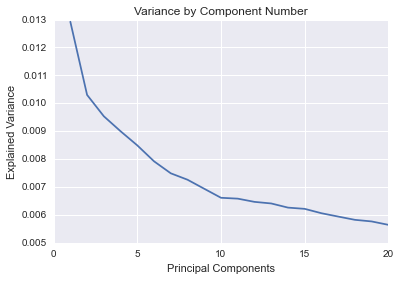

In [52]:
plt.plot(range(1,len(pvars)+1),pvars)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

## Modeling

#### Kmeans

In [21]:
from sklearn.cluster import KMeans

In [32]:
#model = KMeans(n_clusters=8).fit(T)
model = KMeans(n_clusters=12).fit(principal)

In [33]:
#kmean = model.predict(T)
kmean = model.predict(principal)

#### Inertia

In [69]:
n_inertia = []
for i in range(1,25):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans_pca_array = km.fit_transform(principal)
    pca_clusters_array = km.predict(principal)
    inertia = km.inertia_
    n_inertia.append(inertia)

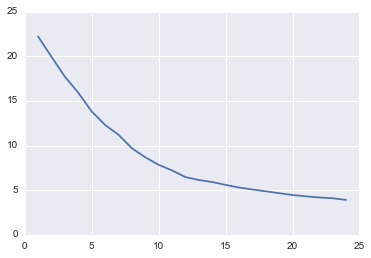

In [70]:
plt.plot(range(1,25),n_inertia)

## Topic Modeling

#### LDA

In [71]:
from sklearn.decomposition import LatentDirichletAllocation

In [75]:
lda = LatentDirichletAllocation(n_topics=20, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
lda.fit(T)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=20, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [41]:
topic_word = lda.components_

In [42]:
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: device girls im know butters oh dont slumber
Topic 1: birthday prescribe pussy answered four reckless stupider aspects
Topic 2: sweeping huho joe realizes house choreography ah punching
Topic 3: talented til painkillers coincidence tents international pollack jew
Topic 4: stillborn belittle bases yeth youll fall nowhere script
Topic 5: thats foreign packets minute considered dont ituh refusing
Topic 6: kono dawgs advancing rodriguez packer tidy club police
Topic 7: names casserole look fosse sip tragic tidings ethnic
Topic 8: se toots spouting workin prophet seniors ouch fly
Topic 9: banjo feelin aahh statue recognize thoughts timtim handy
Topic 10: dealing inn language victim mildmannered republicans shrink sexuality
Topic 11: rewards sun rubbed waiting i’m wwhats stillborn poopin
Topic 12: dont delivery jenny seams im tih toys nfl
Topic 13: j shvek clip hunt nest misterrr fridge cranky
Topic 14: ceremonial scott ahahah good infant phillip baste adler
Topic 15: twerps aight r

## Analysis

In [34]:
df_seas['kmean_pca'] = kmean

In [35]:
df_seas.head()

,Season,Episode,Line,Length,kmean_pca
0,1,1,"School day, school day, teacher's golden ru......",17488,2
1,1,10,"Here you go, Kyle... And here's yours, Stan......",18292,10
2,1,11,"Stan, you know it's almost Valentine's Day.\n ...",16661,2
3,1,12,"...And so, these ancient arrowheads are buried...",16996,0
4,1,13,"Dude! The bus will be here any minute, and Car...",16766,2


In [36]:
df_seas.kmean_pca.value_counts()

0     74
10    61
1     33
4     25
7     17
2     17
9      8
6      8
5      5
3      4
11     3
8      2
Name: kmean_pca, dtype: int64

In [42]:
df_seas[df_seas['kmean_pca'] == 9]

,Season,Episode,Line,Length,kmean_pca
80,14,7,This program contains subject matter\nand lang...,14465,9
89,15,2,Here you go. Here you go. Don't forget to......,16009,9
125,18,4,Well that was a lot of fun. Thanks for invitin...,17178,9
171,4,14,"Doctor, doctor! Will our daughter be okay?\n I...",15725,9
177,4,4,"Dude, did you do all your homework last night?...",19975,9
189,5,2,"Well, you boys must be pretty excited: Your fi...",16971,9
221,7,2,"Ladies and Gentlemen, give it up for JIMMY! T...",17798,9
235,8,2,"Hey fellas.\n Oh hey Jimmy, hey Timmy.\n Timmy...",14125,9


In [91]:
len(df_seas)

257

# JSON OBJECT

In [109]:
df_seas.head()

,Season,Episode,Line,Length,kmean,kmean_pca,EpisodeNum
0,1,1,"School day, school day, teacher's golden ru......",17488,1,2,0101
1,1,10,"Here you go, Kyle... And here's yours, Stan......",18292,1,4,01010
2,1,11,"Stan, you know it's almost Valentine's Day.\n ...",16661,1,2,01011
3,1,12,"...And so, these ancient arrowheads are buried...",16996,1,8,01012
4,1,13,"Dude! The bus will be here any minute, and Car...",16766,1,4,01013


In [107]:
df_seas['EpisodeNum'] = '0' + df_seas['Season'] + '0' + df_seas['Episode']

In [115]:
df_jframe = df_seas[['EpisodeNum', 'kmean_pca']]

In [116]:
df_jframe.to_json('/Users/El-Razi/Desktop/spD3/south_park.json')

# Visualization

In [117]:
#set up colors per clusters using a dict
cluster_colors = {0: '#ec0505', 1: '#ec6e05', 2: '#fdf65e', 3: '#0543ec',
                  4: '#05ec14', 5: '#7505ec', 6: '#d95f02', 7: '#7570b3',
                  8: '#e7298a', 9: '#66a61e', 10: '#1b9e77', 11: '#d95f02', 12: '#7570b3'}
#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}